In [45]:
!pip install pydicom

In [46]:
import pylab

%matplotlib inline
import numpy as np
import pydicom
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
detailed_class_info = pd.read_csv('stage_2_detailed_class_info.csv')
train_labels = pd.read_csv('stage_2_train_labels.csv')

df = pd.merge(left = detailed_class_info, right = train_labels, how = 'left', on = 'patientId')

del detailed_class_info, train_labels
gc.collect()

df.info(null_counts = True)
df.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37629 entries, 0 to 37628
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  37629 non-null  object 
 1   class      37629 non-null  object 
 2   x          16957 non-null  float64
 3   y          16957 non-null  float64
 4   width      16957 non-null  float64
 5   height     16957 non-null  float64
 6   Target     37629 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 2.3+ MB


,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
6,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
7,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1
8,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
9,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0


In [48]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 37626
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   class      30227 non-null  object 
 2   x          9555 non-null   float64
 3   y          9555 non-null   float64
 4   width      9555 non-null   float64
 5   height     9555 non-null   float64
 6   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [79]:
df['patientId'].nunique()

26684

In [74]:
df['patientId'].value_counts()

3239951b-6211-4290-b237-3d9ad17176db    4
7d674c82-5501-4730-92c5-d241fd6911e7    4
31764d54-ea3b-434f-bae2-8c579ed13799    4
32408669-c137-4e8d-bd62-fe8345b40e73    4
76f71a93-8105-4c79-a010-0cfa86f0061a    4
                                       ..
dff6e362-b26f-4af8-8798-eb0609a137b5    1
c925ba99-2541-4782-9101-b087832e3c21    1
4181ded7-557b-4312-bada-062a0f466413    1
d6a2ad68-f1ce-441b-bf20-6c165e33dcd3    1
cc2448c1-4102-4d04-90eb-4bf2385f3328    1
Name: patientId, Length: 26684, dtype: int64

In [50]:
df[df['patientId'] == '7d674c82-5501-4730-92c5-d241fd6911e7']

,patientId,class,x,y,width,height,Target
15291,7d674c82-5501-4730-92c5-d241fd6911e7,Lung Opacity,358.0,320.0,159.0,186.0,1
15292,7d674c82-5501-4730-92c5-d241fd6911e7,Lung Opacity,283.0,528.0,197.0,314.0,1
15293,7d674c82-5501-4730-92c5-d241fd6911e7,Lung Opacity,718.0,573.0,133.0,227.0,1
15294,7d674c82-5501-4730-92c5-d241fd6911e7,Lung Opacity,658.0,315.0,164.0,203.0,1


In [62]:
df[df['patientId'] == '52021b42-19c1-4d5b-8344-4188f4fdfd6a']

,patientId,class,x,y,width,height,Target
9117,52021b42-19c1-4d5b-8344-4188f4fdfd6a,Normal,NaN,NaN,NaN,NaN,0


In [75]:
df[df['patientId'] == '00aecb01-a116-45a2-956c-08d2fa55433f']

,patientId,class,x,y,width,height,Target
18,00aecb01-a116-45a2-956c-08d2fa55433f,Lung Opacity,288.0,322.0,94.0,135.0,1
19,00aecb01-a116-45a2-956c-08d2fa55433f,Lung Opacity,547.0,299.0,119.0,165.0,1


In [77]:
#Distribution of Bounding Boxes and Labels
df['patientId'].value_counts().value_counts()

1    23286
2     3266
3      119
4       13
Name: patientId, dtype: int64

In [52]:
df[df['Target'] == 0]['patientId'].value_counts().value_counts()

1    20672
Name: patientId, dtype: int64

In [78]:
df[df['Target'] == 1]['patientId'].value_counts().value_counts()

2    3266
1    2614
3     119
4      13
Name: patientId, dtype: int64

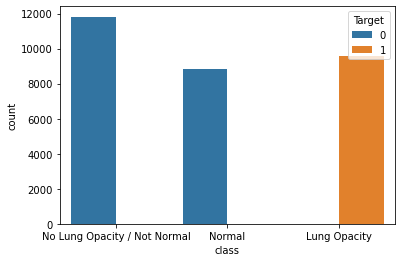

In [54]:
sns.countplot(x = 'class', hue = 'Target', data = df);

In [55]:
df.groupby(['class', 'Target']).size().reset_index(name='Patient Count')

,class,Target,Patient Count
0,Lung Opacity,1,9555
1,No Lung Opacity / Not Normal,0,11821
2,Normal,0,8851


Medical images are stored in a special format known as DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data. 

In [56]:
dcm_file = '0a5c4dcb-33ac-4466-9dbf-42ed5c8ec1f0.dcm'
dcm_data = pydicom.read_file(dcm_file)

print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.18993.1517874414.687086
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.18993.1517874414.687086
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

Most of the standard headers containing patient identifable information have been anonymized (removed) so we are left with a relatively sparse set of metadata. The primary field we will be accessing is the underlying pixel data as follows:

In [57]:
im = dcm_data.pixel_array
print(type(im))
print(im.dtype)
print(im.shape)

<class 'numpy.ndarray'>
uint8
(1024, 1024)


(-0.5, 1023.5, 1023.5, -0.5)

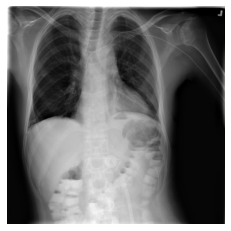

In [58]:
pylab.imshow(im, cmap=pylab.cm.gist_gray)
pylab.axis('off')